In [12]:
import pandas as pd
df = pd.read_csv('Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20241129.csv')
print(df)
#head of teh data is displayed
#zeros are not removed as it has major significance in the prediction.

            Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
0     30/08/2024        16436       10705           225        19026    3925   
1     15/09/2023        15499       10671           267        18421    4519   
2     28/12/2021         1756        2352             0         3775       0   
3     11/01/2023        10536        8347           223        14072       0   
4     11/09/2021          820         612             0         1283       0   
...          ...          ...         ...           ...          ...     ...   
1913  19/01/2023        11337        8671           262        14881       0   
1914  16/08/2023        16791       11800           387        20936    4684   
1915  10/01/2022         5732        3548            73         6644       0   
1916  04/05/2020         3717        1952            70         4411     131   
1917  26/07/2023        16680       11726           347        20438    4738   

      Other  
0      59.0  
1      61.0

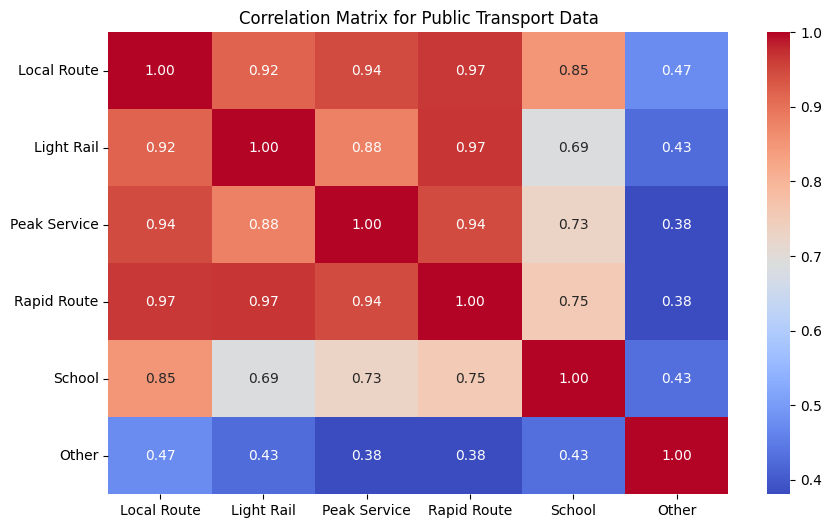

In [3]:
#Coorelation plot is used to find the realtionship between the variables
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
numeric_data = df.drop(columns=['Date'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for Public Transport Data")
plt.show()


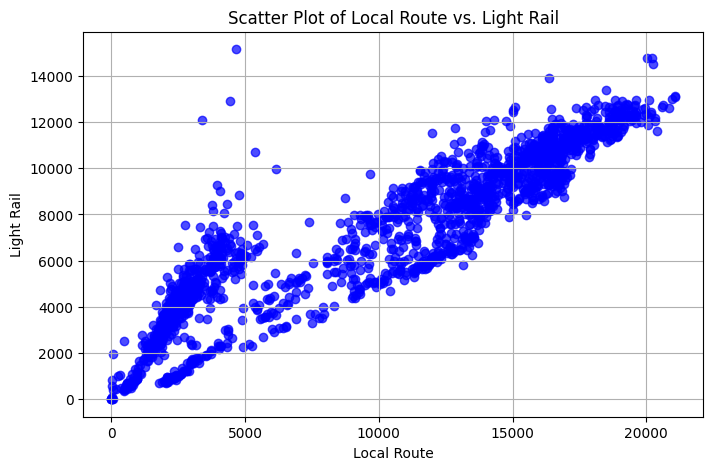

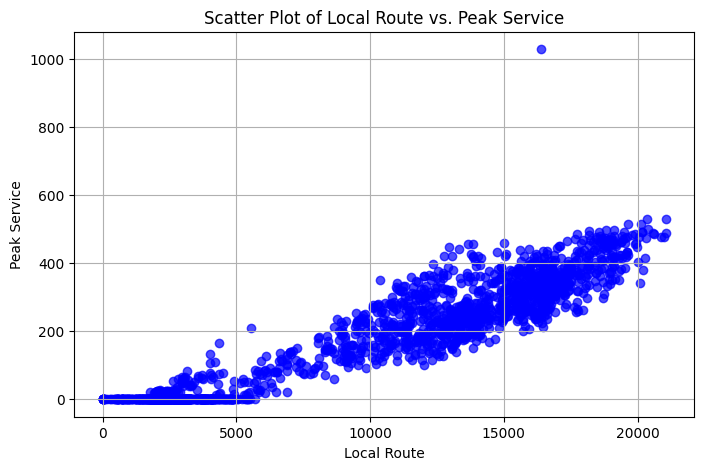

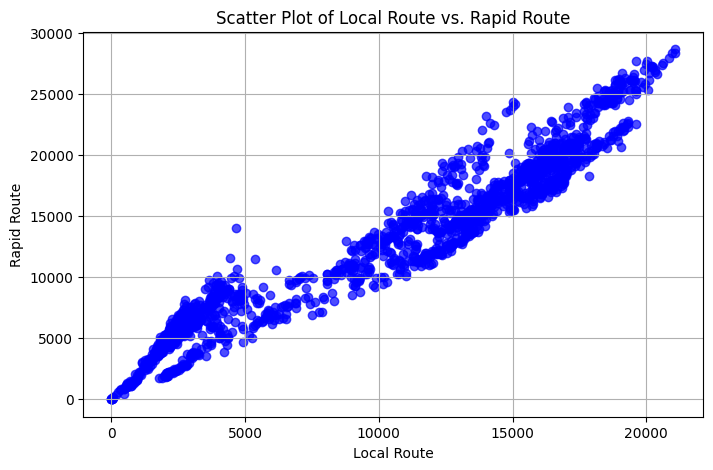

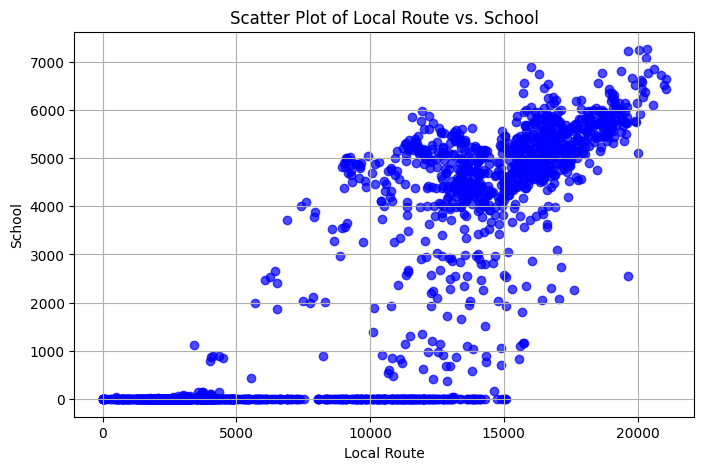

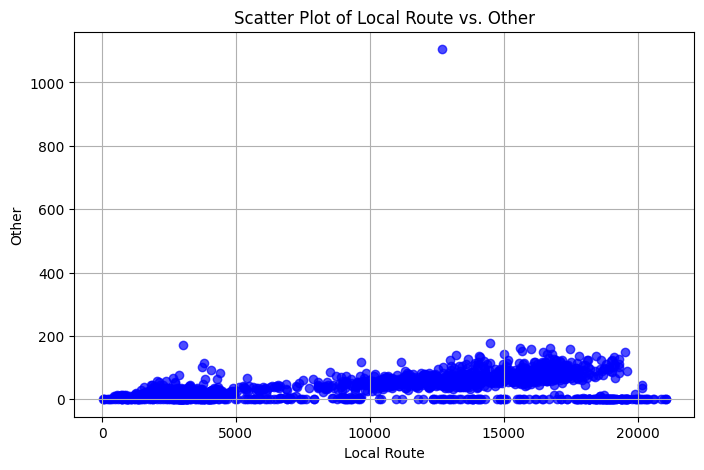

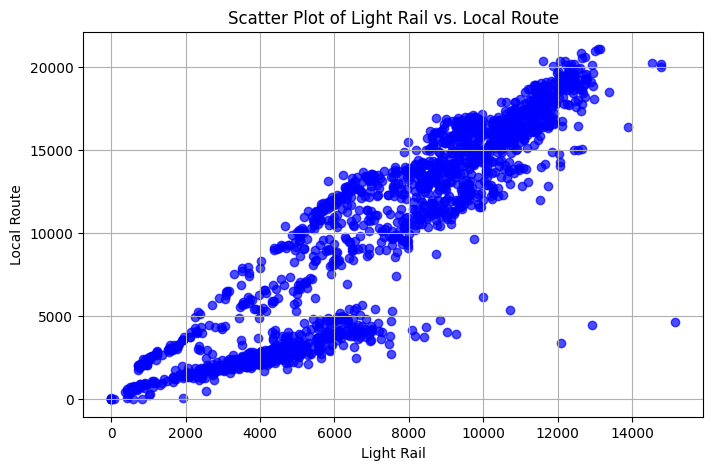

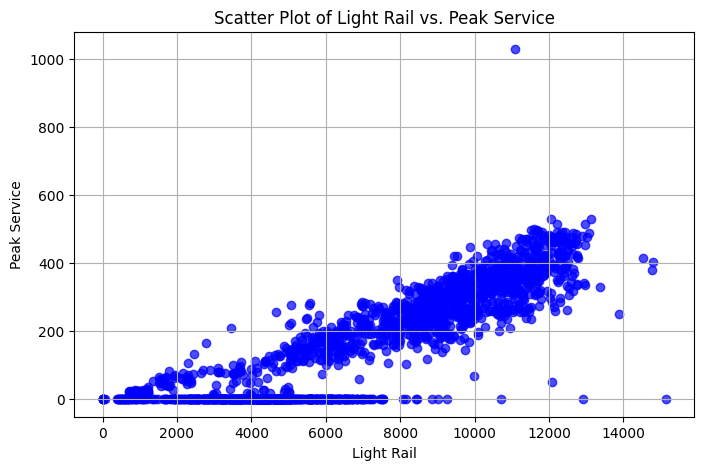

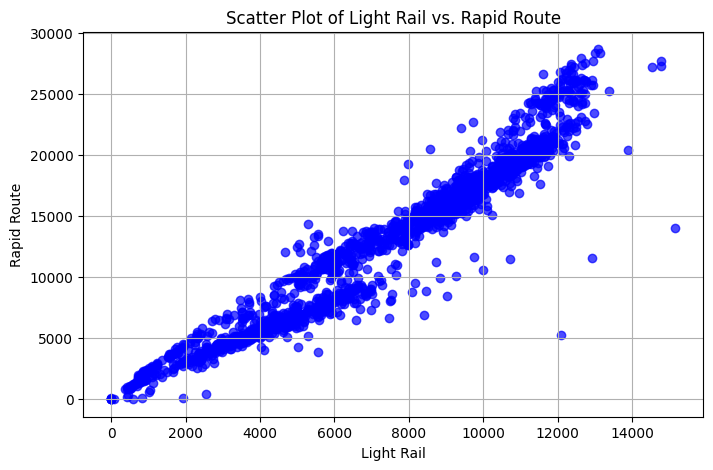

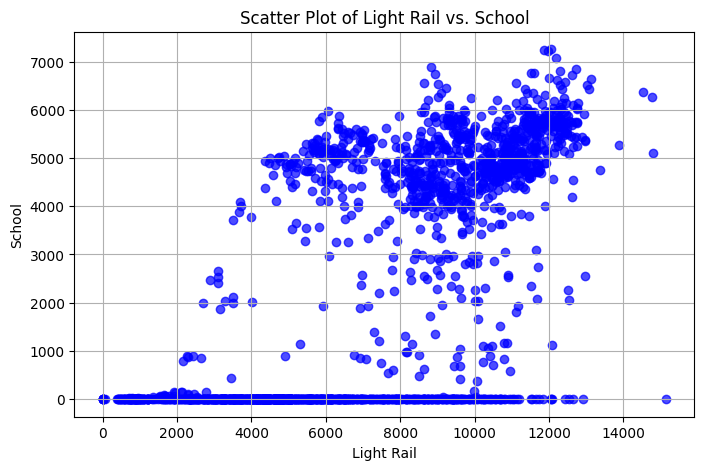

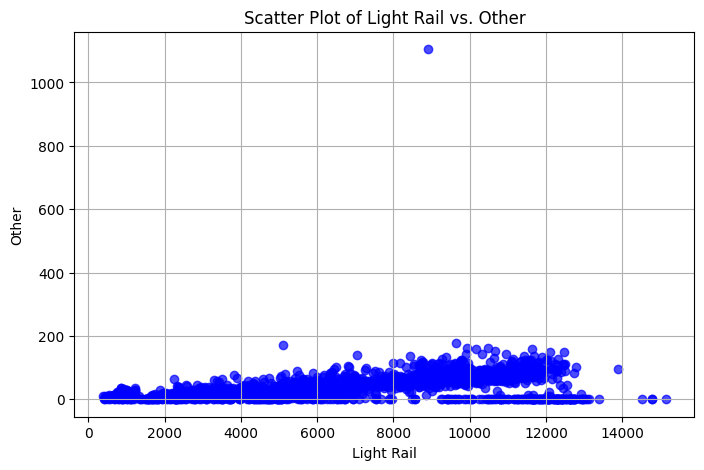

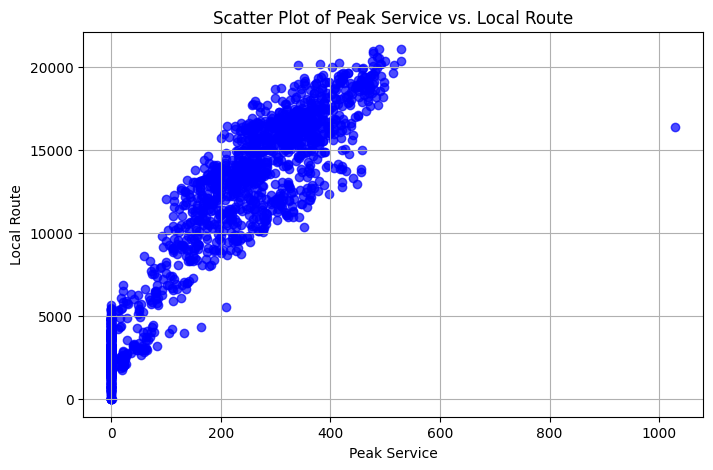

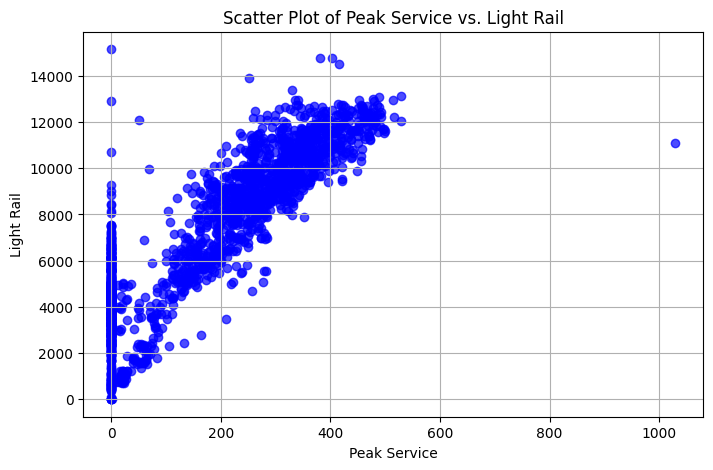

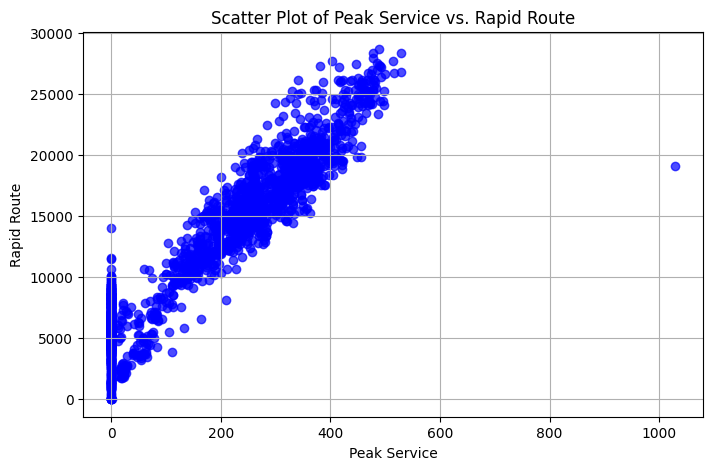

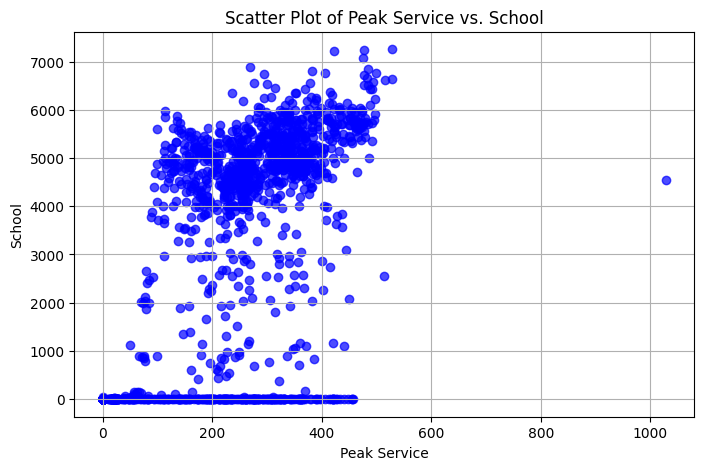

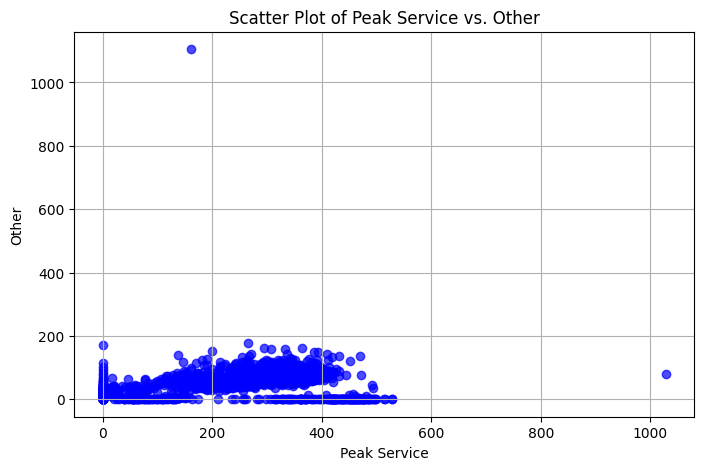

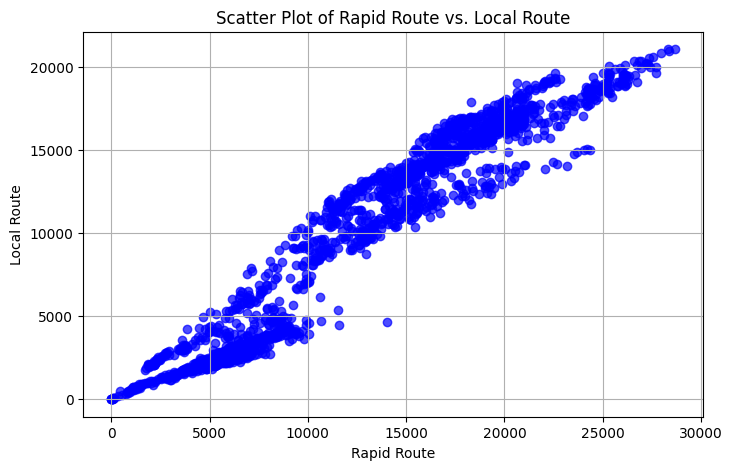

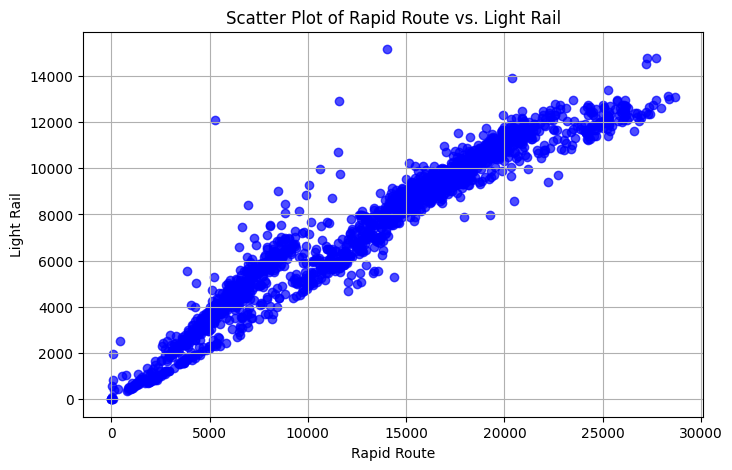

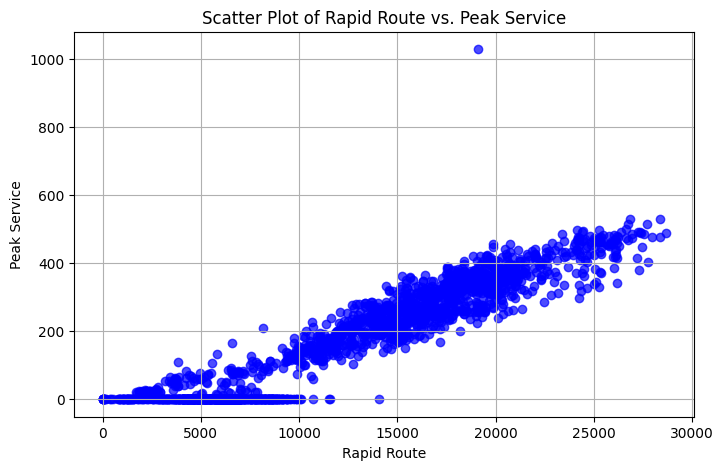

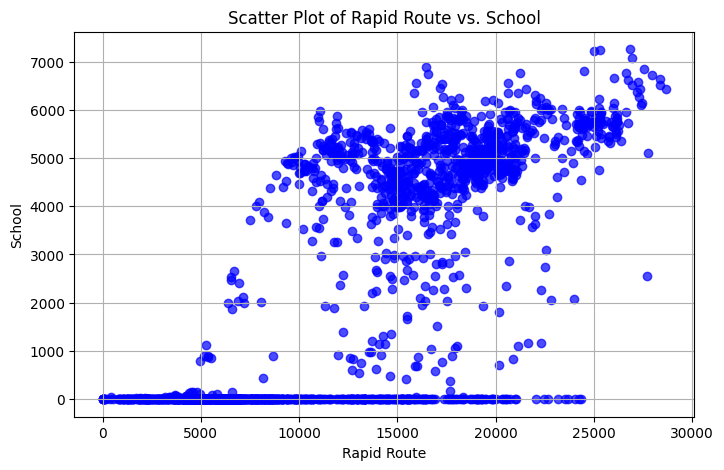

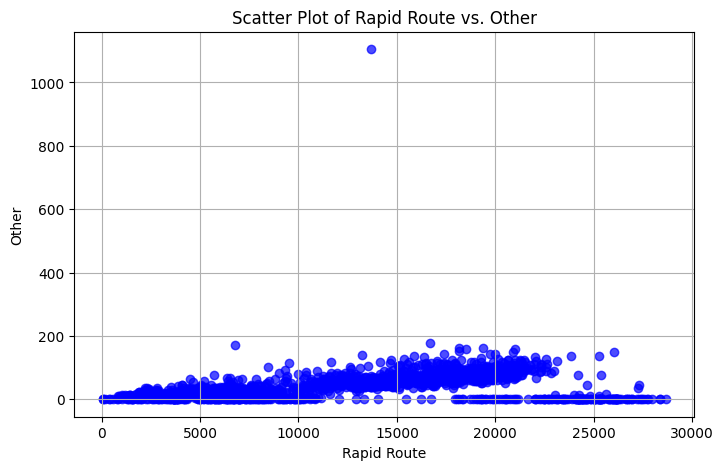

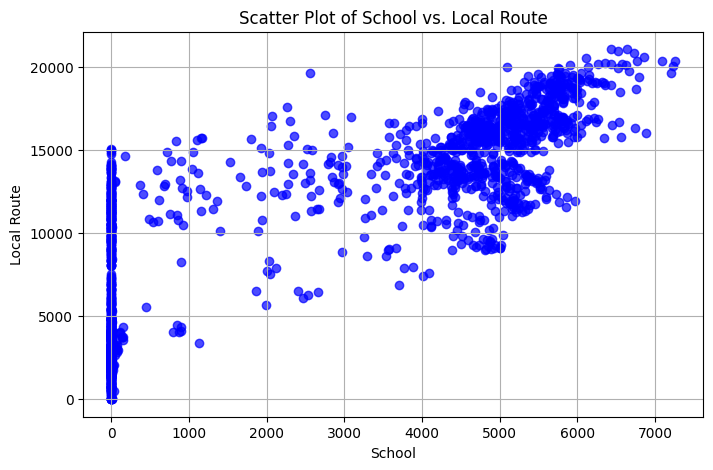

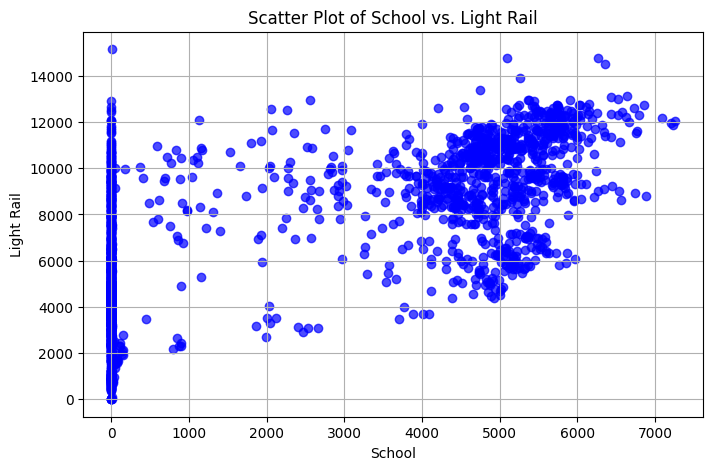

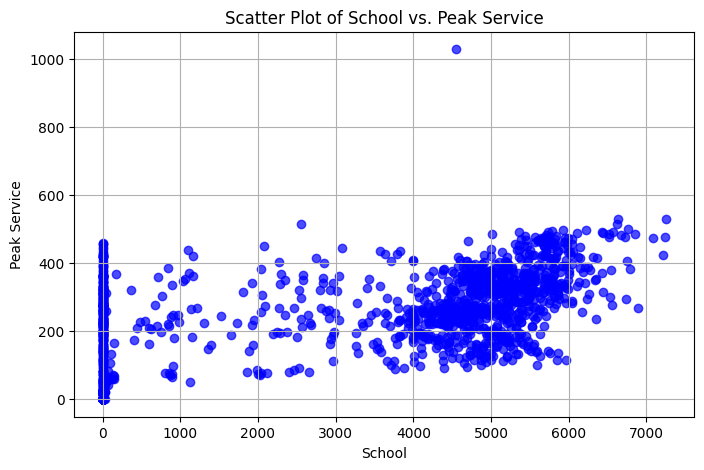

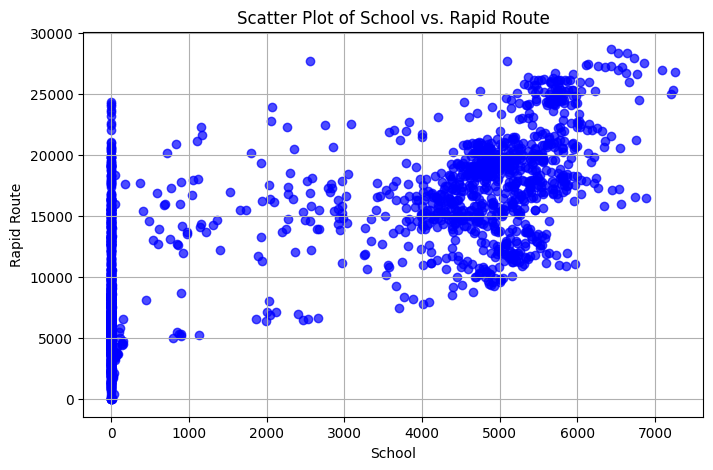

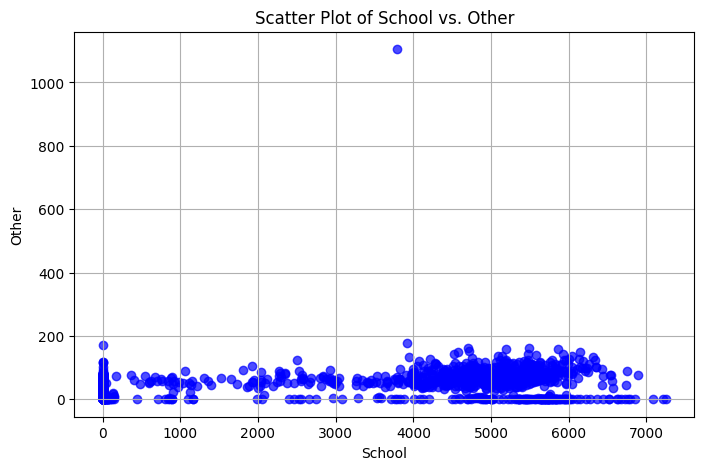

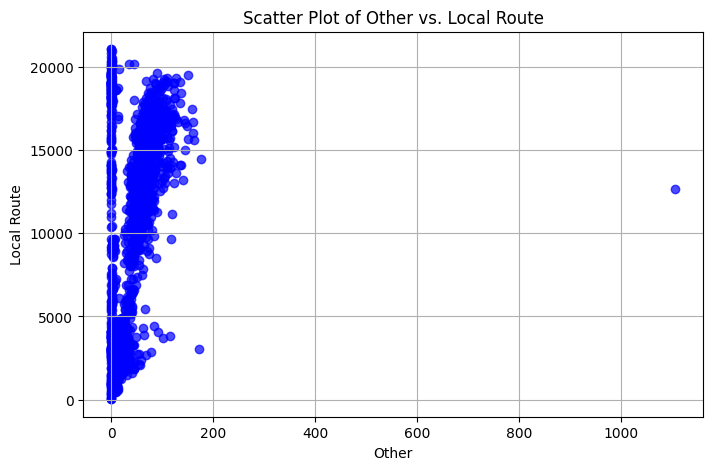

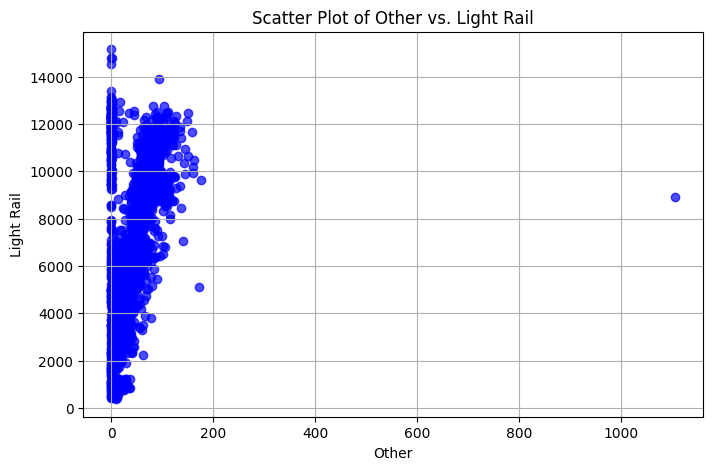

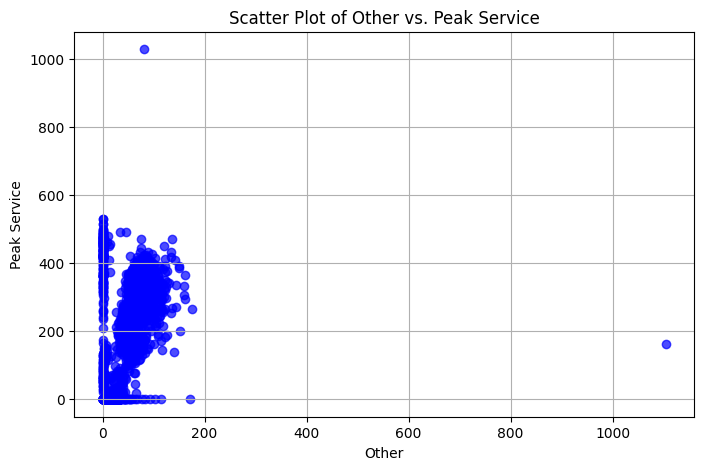

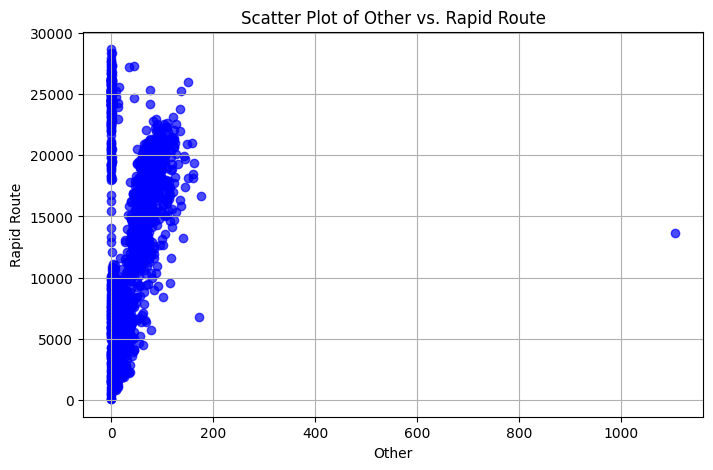

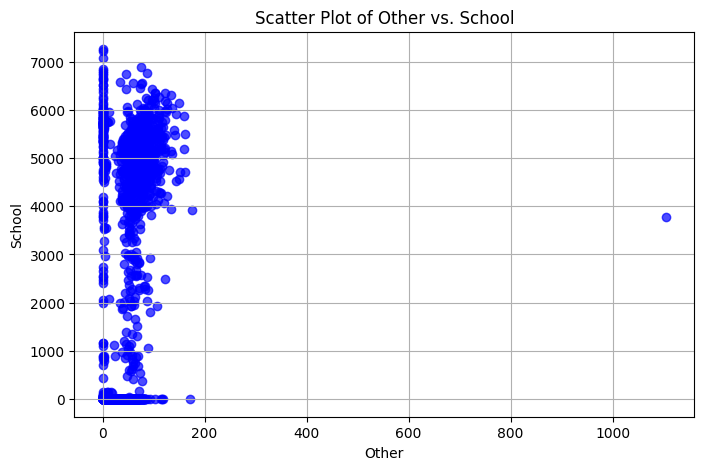

In [27]:
#Scatter plots helps us to know about the relationship between 2 varibales
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for col1 in numeric_data.columns:
    for col2 in numeric_data.columns:
        if col1 != col2:
            plt.figure(figsize=(8, 5))
            plt.scatter(df[col1], df[col2], alpha=0.7, color='blue')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.title(f'Scatter Plot of {col1} vs. {col2}')
            plt.grid(True)
            plt.show()

**FINAL CODE**

In [25]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error


df = pd.read_csv('Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20241129.csv')  # Update with your file path
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.set_index('Date', inplace=True)

columns_to_forecast = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

forecast_table = {}
metrics = {}

for col in columns_to_forecast:

    model = ExponentialSmoothing(df[col], trend='add', seasonal='add', seasonal_periods=7)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=7)
    forecast_table[col] = forecast


    actual_values = df[col].tail(7)

    mae = mean_absolute_error(actual_values, forecast)
    mse = mean_squared_error(actual_values, forecast)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual_values - forecast) / actual_values)) * 100

    metrics[col] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape
    }
forecast_df = pd.DataFrame(forecast_table)
forecast_df.index = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=7, freq='D')
metrics_df = pd.DataFrame(metrics).T

print("Forecasted Values for the Next 7 Days:")
print(forecast_df)
print("\nEvaluation Metrics for the Forecast:")
print(metrics_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is av

Forecasted Values for the Next 7 Days:
             Local Route   Light Rail  Peak Service   Rapid Route       School
2023-07-27   8913.823101  6616.589816    151.190640  11489.171362  1989.079093
2023-07-28   8980.931238  6979.900797    158.166343  11828.349457  1815.961964
2023-07-29   9052.388280  7077.569082    170.703295  12096.502827  1481.795844
2023-07-30   9181.088280  6884.574498    168.845453  12081.919555  1990.269539
2023-07-31   8842.172492  6885.372587    163.745026  11772.872704  1567.800591
2023-08-01  10198.787927  7371.889496    182.184799  12790.774588  2320.636376
2023-08-02  11330.372687  8097.313934    221.407463  14544.870495  2435.570947

Evaluation Metrics for the Forecast:
                      MAE           MSE         RMSE  MAPE
Local Route   4282.317044  2.403898e+07  4902.956099   NaN
Light Rail    3141.587936  1.226938e+07  3502.767490   NaN
Peak Service   114.230947  1.551777e+04   124.570351   NaN
Rapid Route   5241.647501  3.385653e+07  5818.636644   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-25-f59600ca9185>:37: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((actual_values - forecast) / actual_values)) * 100
<ipython-input-25-f59600ca9185>:37: RuntimeWarning: '<' not supported between instances of 